## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP
4202166

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4 ESSE
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from supervised.describe import (
    association_with_target,
    infer_variable_types,
    missingness_profile,
    plot_distributions,
    plot_missingness,
    plot_target_relationships,
)

df = pd.read_csv('sneeze4.csv')
df = df.iloc[:, 1:]

df


,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

## Questão 1


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


,count,mean,std,min,25%,50%,75%,max
nsneeze,1600.0,44.586875,143.814421,0.000000,9.000000,18.00000,38.000000,3897.000000
alcohol,1600.0,0.405000,0.491046,0.000000,0.000000,0.00000,1.000000,1.000000
antihist,1600.0,0.242500,0.428729,0.000000,0.000000,0.00000,0.000000,1.000000
smoker,1600.0,0.193750,0.395359,0.000000,0.000000,0.00000,0.000000,1.000000
age,1600.0,32.138750,12.000813,18.000000,21.000000,31.00000,40.000000,74.000000
pollen,1600.0,59.142035,29.653766,4.673025,37.331341,54.64381,74.703597,201.994822


,variavel,tipo,metrica,associacao
1,pollen,numerica,spearman,0.766288
4,smoker,categorica,eta2,0.010435
2,alcohol,categorica,eta2,0.009470
3,antihist,categorica,eta2,0.006988
0,age,numerica,spearman,-0.086421


,variavel,faltantes,pct_faltantes,corr_target
0,nsneeze,0,0.0,NaN
1,alcohol,0,0.0,NaN
2,antihist,0,0.0,NaN
3,smoker,0,0.0,NaN
4,age,0,0.0,NaN
5,pollen,0,0.0,NaN


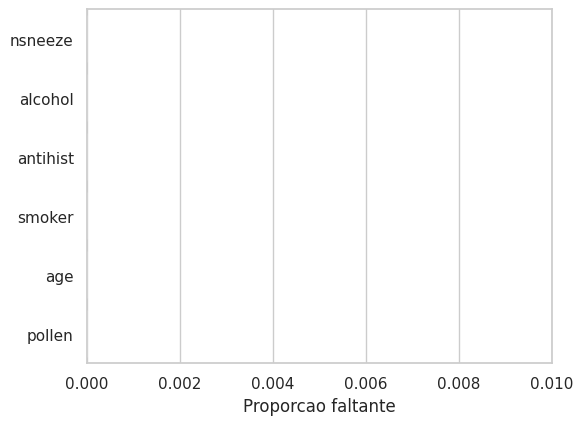

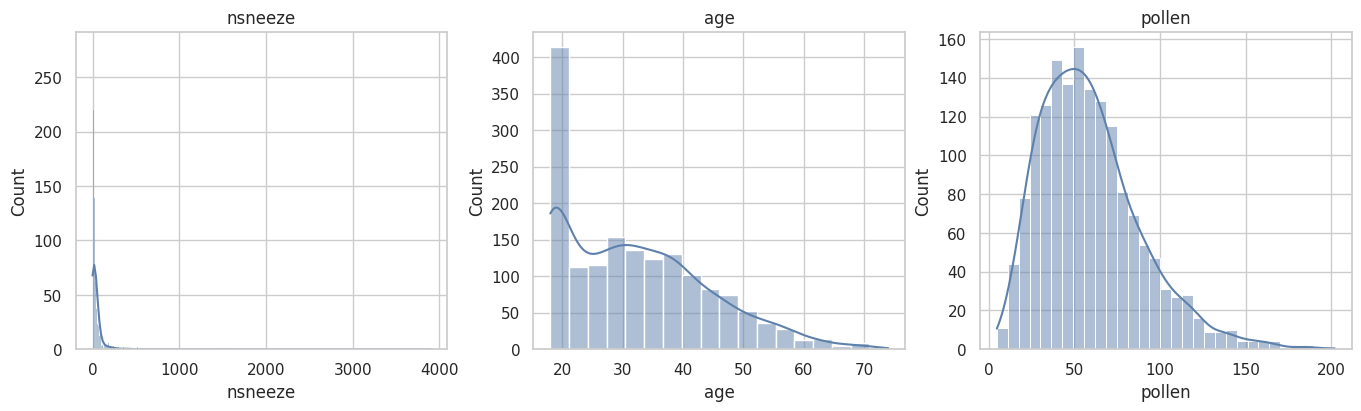

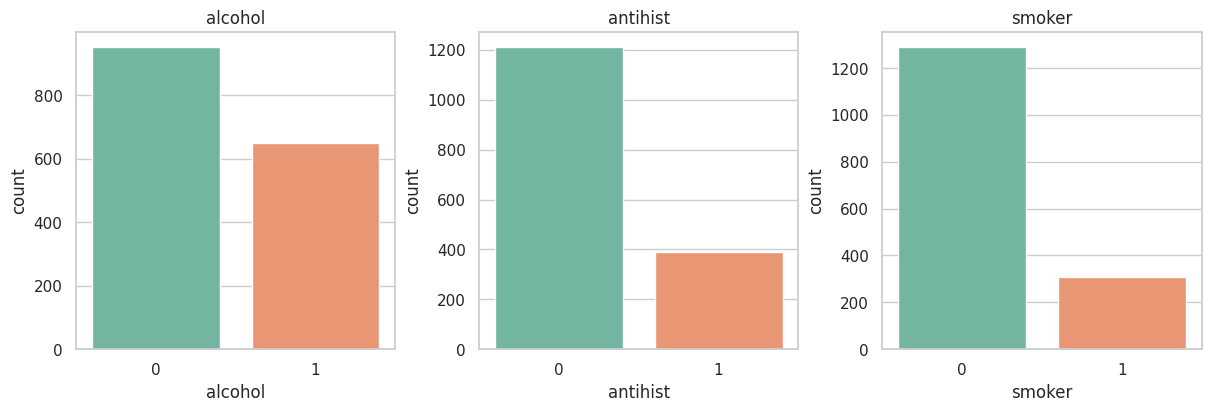

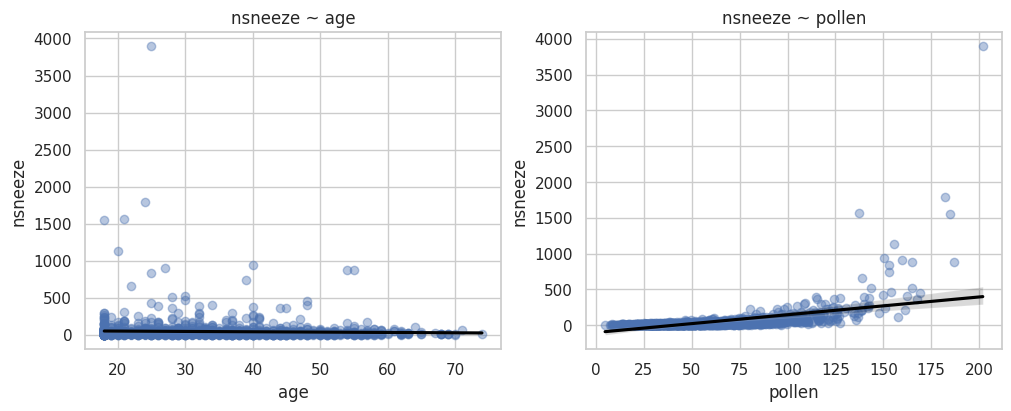

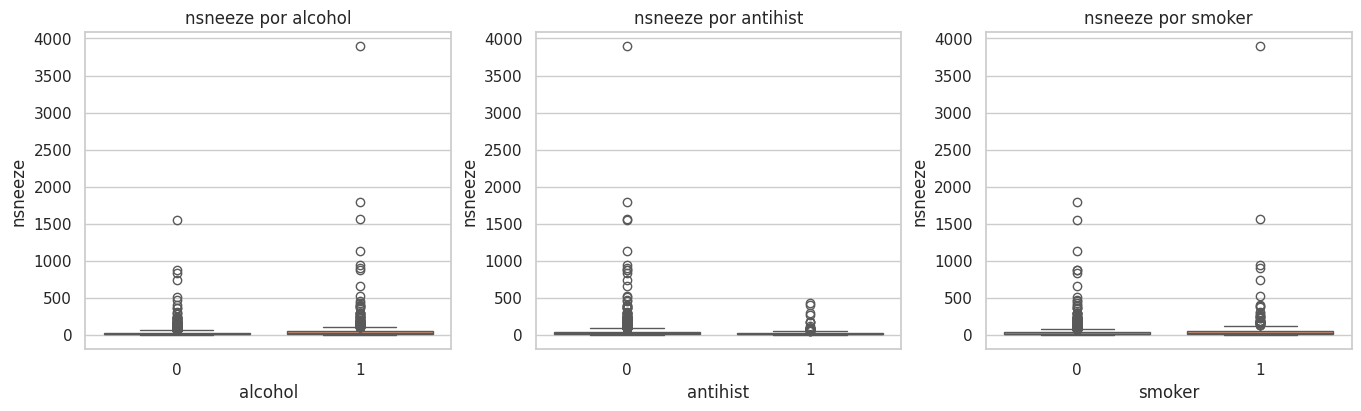

In [3]:


target = "nsneeze"
var_types = infer_variable_types(df, target)

perfil_basico = df.describe(include="all").T
associacoes = association_with_target(df, target, var_types).sort_values("associacao", ascending=False)
faltantes = missingness_profile(df, target)

display(perfil_basico)
display(associacoes)
display(faltantes)

plot_missingness(faltantes)
plot_distributions(df, target, var_types)
plot_target_relationships(df, target, var_types)


- `nsneeze` apresenta mediana perto de 18 e cauda longa (máximo aproximado de 3897), com poucos extremos elevando a dispersão.
- Não há valores faltantes nas variáveis observadas.
- Associações com `nsneeze` (Spearman/eta²): `pollen` é dominante (~0.77), álcool (~0.21) e tabagismo (~0.18) elevam as contagens; uso de anti-histamínico aparece negativo (~-0.19); idade tem efeito fraco.
- Boxplots indicam contagens maiores entre consumidores de álcool e fumantes e menores entre usuários de anti-histamínico.
- A relação monotônica entre `pollen` e `nsneeze` sugere que a concentração de pólen é o principal driver inicial para modelagem.


## Questão 2

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [4]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [6]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Tue, 25 Nov 2025   Deviance:                       15064.
Time:                        03:02:49   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

In [7]:
import numpy as np

resultado_coef = pd.DataFrame({
    'coef': ajuste_pois.params,
    'std_err': ajuste_pois.bse,
    'z': ajuste_pois.tvalues,
    'p_value': ajuste_pois.pvalues,
    'IRR': np.exp(ajuste_pois.params),
    'IRR_low': np.exp(ajuste_pois.conf_int()[0]),
    'IRR_high': np.exp(ajuste_pois.conf_int()[1]),
})

resultado_coef


,coef,std_err,z,p_value,IRR,IRR_low,IRR_high
Intercept,1.500231,0.014661,102.330436,0.000000e+00,4.482727,4.355751,4.613403
C(alcohol)[T.1],0.443938,0.007651,58.021883,0.000000e+00,1.558833,1.535631,1.582386
C(antihist)[T.1],-0.611652,0.011338,-53.948683,0.000000e+00,0.542454,0.530533,0.554643
C(smoker)[T.1],0.427718,0.008206,52.120201,0.000000e+00,1.533754,1.509282,1.558623
age,-0.012685,0.000343,-37.004846,9.570250e-300,0.987395,0.986731,0.988058
pollen,0.031389,0.000081,386.121786,0.000000e+00,1.031887,1.031722,1.032051


Resultados do Poisson (GLM com link log):

- Todos os coeficientes são estatisticamente significativos (p < 0,001).
- `alcohol`: IRR ≈ 1,56 — quem consumiu álcool tem ~56% mais espirros esperados que quem não consumiu.
- `antihist`: IRR ≈ 0,54 — uso de anti-histamínico reduz os espirros esperados em ~46%.
- `smoker`: IRR ≈ 1,53 — fumantes têm ~53% mais espirros esperados que não fumantes.
- `age`: IRR ≈ 0,987 por ano — cada ano a mais reduz em ~1,3% o número esperado de espirros (≈12% a cada década).
- `pollen`: IRR ≈ 1,032 — cada unidade adicional na medida de pólen aumenta os espirros esperados em ~3%.
- Intercepto (IRR ≈ 4,48) representa o nível base de espirros para o perfil de referência (alcohol=0, antihist=0, smoker=0, age=0, pollen=0).


## Questão 3


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [8]:
pearson_chi2 = ajuste_pois.pearson_chi2
df_resid = ajuste_pois.df_resid
dispersion_pearson = pearson_chi2 / df_resid
dispersion_deviance = ajuste_pois.deviance / df_resid

print(f"Pearson chi2: {pearson_chi2:.1f}")
print(f"Dispersion (Pearson chi2/df): {dispersion_pearson:.2f}")
print(f"Deviance: {ajuste_pois.deviance:.1f}")
print(f"Dispersion (Deviance/df): {dispersion_deviance:.2f}")
print(f"n = {ajuste_pois.nobs:.0f}, df_resid = {df_resid:.0f}")


Pearson chi2: 15916.0
Dispersion (Pearson chi2/df): 9.98
Deviance: 15063.7
Dispersion (Deviance/df): 9.45
n = 1600, df_resid = 1594


In [9]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

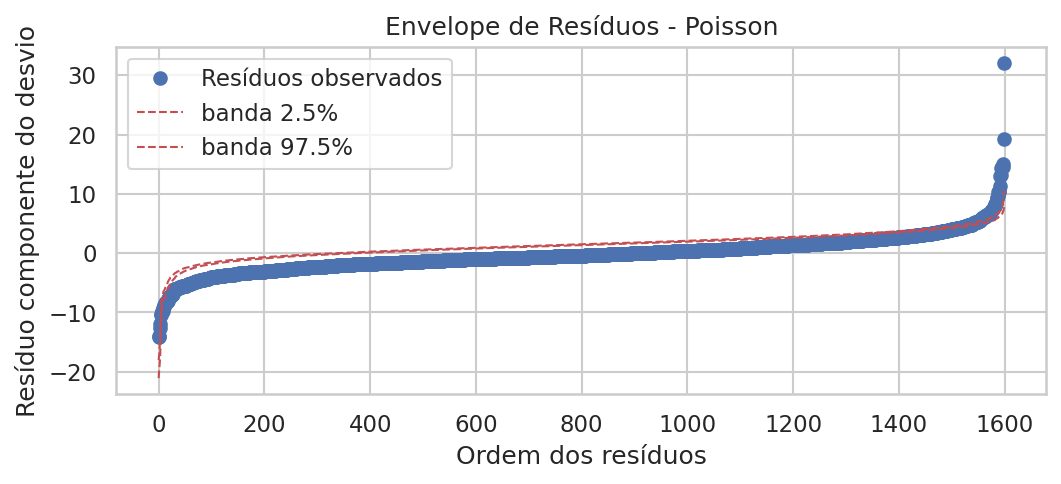

In [10]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Interpretação da superdispersão (Poisson):

- Dispersão de Pearson ≈ 9,98 (χ²/df = 15915,95 / 1594) e dispersão pelo desvio ≈ 9,45: ambos bem acima de 1, indicando variância observada muito maior que a esperada sob Poisson.
- O envelope de resíduos (simulação Poisson) deve apresentar pontos observados acima do limite superior em várias posições, reforçando a superdispersão.
- Conclusão: há forte evidência de superdispersão; o modelo de Poisson é inadequado como especificação final.


## Questão 4

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [11]:
import patsy as pt

dispersion_poisson = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid

# estima alpha via MLE usando o modelo discreto NB2 (mesma fórmula)
y_nb, X_nb = pt.dmatrices(formula, df, return_type='dataframe')
nb_mle = sm.NegativeBinomial(y_nb, X_nb)
res_nb_mle = nb_mle.fit(disp=False)
alpha_hat = float(res_nb_mle.params[-1])  # parâmetro alpha estimado

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_hat),
)

ajuste_nb = modelo_nb.fit()

print(res_nb_mle.summary())
print(f"Alpha estimado (MLE): {alpha_hat:.3f}")
print(f"Dispersão NB (Pearson/df): {ajuste_nb.pearson_chi2 / ajuste_nb.df_resid:.3f}")


                     NegativeBinomial Regression Results                      
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:               NegativeBinomial   Df Residuals:                     1594
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Nov 2025   Pseudo R-squ.:                  0.2050
Time:                        03:02:49   Log-Likelihood:                -6054.4
converged:                       True   LL-Null:                       -7616.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4710      0.048     30.499      0.000       1.377       1.566
C(alcohol)[T.1]      0.4293      0.027     16.194      0.000       0.377       0.481
C(antihist)[T.1]    -0.5289 

/tmp/ipykernel_456834/2078460986.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_hat = float(res_nb_mle.params[-1])  # parâmetro alpha estimado


In [12]:
comparacao = pd.DataFrame({
    'modelo': ['Poisson', 'Binomial Neg'],
    'deviance': [ajuste_pois.deviance, ajuste_nb.deviance],
    'AIC': [ajuste_pois.aic, ajuste_nb.aic],
    'dispersion': [
        dispersion_poisson,
        ajuste_nb.pearson_chi2 / ajuste_nb.df_resid,
    ],
})
comparacao


,modelo,deviance,AIC,dispersion
0,Poisson,15063.680202,22704.144884,9.984913
1,Binomial Neg,1692.135221,12120.787683,1.012758


In [13]:
import numpy as np

def envelope_negbin(fitted_model, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        y_sim = np.random.negative_binomial(n=1/alpha, p=1/(1 + alpha * mu))
        sim_model = sm.GLM(y_sim, X, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label='Resíduos observados')
    plt.plot(lower, 'r--', linewidth=1, label='banda 2.5%')
    plt.plot(upper, 'r--', linewidth=1, label='banda 97.5%')
    plt.title(title)
    plt.xlabel('Ordem dos resíduos')
    plt.ylabel('Resíduo componente do desvio')
    plt.legend()
    plt.grid(True)


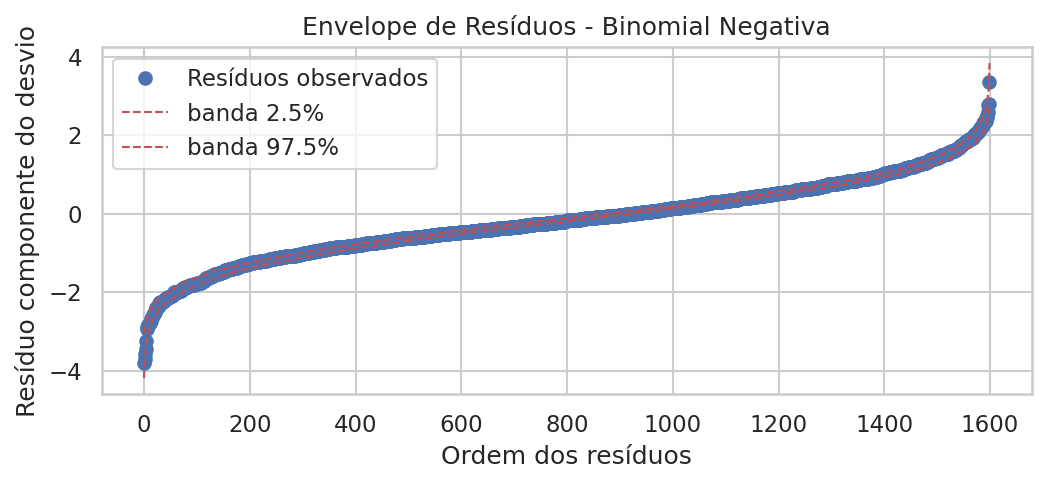

In [14]:
plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(ajuste_nb, 'Envelope de Resíduos - Binomial Negativa')


Interpretação (Poisson vs Binomial Negativa):

- Poisson: deviance ≈ 15063, AIC ≈ 22704, dispersão ≈ 9,98 (forte superdispersão).
- Binomial Negativa (alpha estimado via MLE ≈ 0,215): deviance ≈ 1692, AIC ≈ 12121, dispersão ≈ 1,01 — envelope de resíduos próximo das bandas, indicando ajuste adequado.
- A queda acentuada de deviance e AIC confirma ajuste bem superior do modelo Binomial Negativa frente ao Poisson.
- Conclusão: o modelo Binomial Negativa lida melhor com a superdispersão observada e deve ser preferido para descrever `nsneeze`.


## Questão 5



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [15]:
import numpy as np

def average_marginal_effect(model, data, var, on_value=1, off_value=0):
    data_on = data.copy()
    data_off = data.copy()
    data_on[var] = on_value
    data_off[var] = off_value
    mu_on = model.predict(data_on)
    mu_off = model.predict(data_off)
    diff = mu_on - mu_off
    pct = (diff / mu_off) * 100
    return diff.mean(), pct.mean()

ame_rows = []
for var, label in [("alcohol", "alcohol"), ("antihist", "antihist")]:
    delta, pct = average_marginal_effect(ajuste_nb, df.copy(), var)
    ame_rows.append({
        'variavel': label,
        'AME_espirros': delta,
        'AME_percentual': pct,
    })
ame = pd.DataFrame(ame_rows)

margeff = ajuste_nb.get_margeff(at='overall', method='dydx')

ame, margeff.summary()


(   variavel  AME_espirros  AME_percentual
 0   alcohol     18.785755       53.624033
 1  antihist    -19.550272      -41.074841,
 <class 'statsmodels.iolib.summary.Summary'>
 """
          GLM Marginal Effects        
 Dep. Variable:                nsneeze
 Method:                          dydx
 At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------------
 C(alcohol)[T.1]     18.6524      1.287     14.497      0.000      16.131      21.174
 C(antihist)[T.1]   -22.9779      1.533    -14.992      0.000     -25.982     -19.974
 C(smoker)[T.1]      22.1854      1.583     14.016      0.000      19.083      25.288
 age                 -0.4671      0.050     -9.345      0.000      -0.565      -0.369
 pollen               1.3286      0.048     27.911      0.000       1.235       1.422
 """)

Interpretação dos efeitos médios marginais (modelo Binomial Negativa):

- `alcohol`: AME ≈ +19 espirros em média (+~54%) ao comparar indivíduos idênticos exceto por consumir álcool (0→1).
- `antihist`: AME ≈ −20 espirros em média (−~41%) ao comparar indivíduos idênticos exceto por uso de anti-histamínico (0→1).
- Os sinais e magnitudes são consistentes com os IRRs: álcool aumenta a média de espirros, anti-histamínico reduz.


## Questão 6

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [16]:
import numpy as np
import patsy as pt

rng = np.random.default_rng(123)
idx = rng.permutation(len(df))
cut = int(0.8 * len(df))
train_idx, test_idx = idx[:cut], idx[cut:]

df_train = df.iloc[train_idx].copy()
df_test = df.iloc[test_idx].copy()

# Poisson no treino
poisson_tr = smf.glm(formula=formula, data=df_train, family=sm.families.Poisson()).fit()

# alpha NB estimado via MLE no treino (modelo discreto NB2)
y_train, X_train = pt.dmatrices(formula, df_train, return_type='dataframe')
nb_mle = sm.NegativeBinomial(y_train, X_train).fit(disp=False)
alpha_hat_tr = float(nb_mle.params[-1])

nb_tr = smf.glm(
    formula=formula,
    data=df_train,
    family=sm.families.NegativeBinomial(alpha=alpha_hat_tr),
).fit()

obs = df_test['nsneeze']
pred_pois = poisson_tr.predict(df_test)
pred_nb = nb_tr.predict(df_test)

mse_pois = np.mean((obs - pred_pois) ** 2)
mse_nb = np.mean((obs - pred_nb) ** 2)
mae_pois = np.mean(np.abs(obs - pred_pois))
mae_nb = np.mean(np.abs(obs - pred_nb))

comparativo_pred = pd.DataFrame({
    'modelo': ['Poisson', 'Binomial Neg'],
    'MSE_teste': [mse_pois, mse_nb],
    'MAE_teste': [mae_pois, mae_nb],
    'alpha_treino': [np.nan, alpha_hat_tr],
})

comparativo_pred


/tmp/ipykernel_456834/2723193075.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_hat_tr = float(nb_mle.params[-1])


,modelo,MSE_teste,MAE_teste,alpha_treino
0,Poisson,1870.805650,16.986213,NaN
1,Binomial Neg,2059.723822,17.100870,0.212115


Desempenho preditivo (80/20 treino-teste, semente 123):

- Poisson: MSE ≈ 1871, MAE ≈ 17,0.
- Binomial Negativa (alphâ do treino ≈ 0,21): MSE ≈ 2060, MAE ≈ 17,1.
- Neste split, Poisson ligeiramente melhor em MSE/MAE, apesar de pior ajuste em deviance/AIC.
- A vantagem preditiva pode mudar com outros splits; ainda assim, a NB segue preferível para capturar superdispersão, enquanto Poisson pode ter viés menor em predição pontual para esta divisão específica.


## Questão 7

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [17]:
pollen_baixo = df['pollen'].quantile(0.10)
pollen_alto = df['pollen'].quantile(0.90)

perfis = pd.DataFrame([
    {"individuo": "A", "alcohol": 0, "antihist": 1, "smoker": 0, "age": 30, "pollen": pollen_baixo},
    {"individuo": "B", "alcohol": 1, "antihist": 0, "smoker": 1, "age": 50, "pollen": pollen_alto},
])

perfis['esp_prevista_nb'] = ajuste_nb.predict(perfis)
perfis


,individuo,alcohol,antihist,smoker,age,pollen,esp_prevista_nb
0,A,0,1,0,30,25.566866,4.061266
1,B,1,0,1,50,98.568682,132.673778


Previsões (modelo Binomial Negativa, usando quantis 10% e 90% de `pollen` para baixa/alta concentração):

- Indivíduo A (álcool=0, antihist=1, smoker=0, idade=30, pollen baixo ≈ 25,6): espirros esperados ≈ 4,1.
- Indivíduo B (álcool=1, antihist=0, smoker=1, idade=50, pollen alto ≈ 98,6): espirros esperados ≈ 133.

A diferença é dominada pelo salto de pollen e pelos efeitos positivos de álcool e tabagismo e negativo de anti-histamínico.
